In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob

Now that you've got several feature extraction methods in your toolkit, you're almost ready to train a classifier, but first, as in any machine learning application, you need to normalize your data. Python's `sklearn` package provides you with the `StandardScaler()` method to accomplish this task. 

**To apply `StandardScaler()` you need to first have your data in the right format, as a numpy array where each row is a single feature vector.** I will often create a list of feature vectors, and then convert them like this:

In [11]:
# Step 1:
# feature_list = [feature_vec1, feature_vec2, ...]

# Create an array stack
# Note: StandardScaler() expects np.float64
# X = np.vstack(feature_list.astype(np.float64))

You can then fit a scaler to X, and scale it like this:

In [12]:
# Step 2:
# Fit a per-column scaler
# X_scaler = StandardScaler().fit(X)

# Apply a scaler to X
# scaled_X = X_scaler.transform(X)

Now, `scaled_X` contains the normalized feature vectors.

In [31]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)

    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        img = mpimg.imread(file)
        
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(img)
            
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # print('Spatial Features: ', spatial_features)

        # Apply color_hist() to get color histogram features
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # print('History Features:', hist_features)
        
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features,hist_features)))
    # Return list of feature vectors
    return features

In [32]:
cars = glob.glob('vehicles_smallset/**/*.jpeg')
notcars = glob.glob('non-vehicles_smallset/**/*.jpeg')

In [33]:
car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

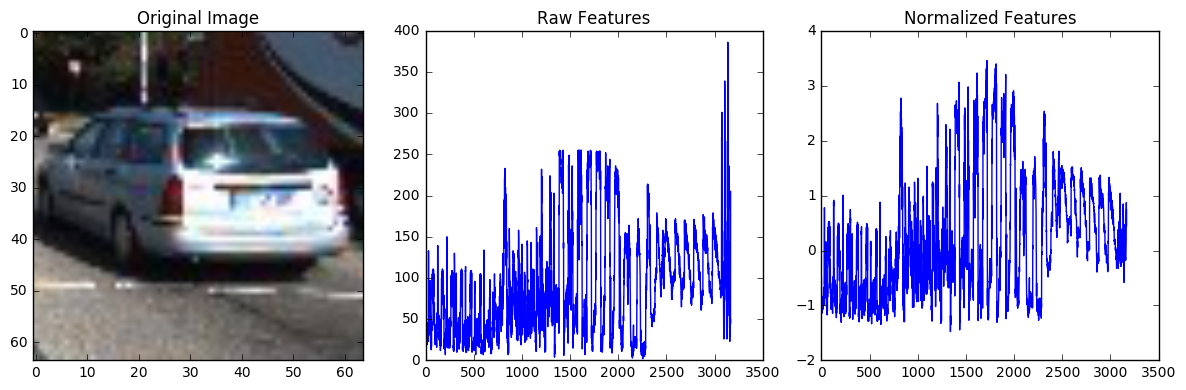

In [34]:
if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
    plt.show()
else: 
    print('Your function only returns empty feature vectors...')

---

### Data Preparation

| Data Preparation Step        | Purpose           |
| ------------- |:-------------:|
| Prepare a balanced dataset.      | To avoid having your algorithm simply classify everything as belonging to the majority class. |
| Random Shuffling of the Data      | To avoid problems due to ordering of the data.      |
| Splitting the data into a Training and Testing Set | To avoid overfitting / improve generalization      |
| Normalization of features, typically to zero mean and unit variance | To avoid individual features or sets of features dominating the resposnve of your classifier|
